<h1>JOB KOREA 웹 크롤링 </h1>
<h3> 데이터 분석이라는 단어를 검색하고 모든 페이지에서 나오는 일자리에 대한 데이터를 받기,정리,의미 착기</h3>
<div class="row">
  <div class="column">
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<img src="https://oopy.lazyrockets.com/api/rest/cdn/image/0821aa81-6c17-485e-98b4-9589a62e7ae2.png" style="height: 300px; width:400px;"/><br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<img src="./jun.png" style="height: 100px; width:100px;"  /> <img src="./ana.png" style="height: 100px; width:100px;"  /> <img src="./inso.png" style="height: 100px; width:100px;"  /> <img src="./ebru.png" style="height: 100px; width:100px;"  /> <img src="./furkan.png" style="height: 100px; width:100px;"  />
  </div>
</div>

 
<h2> &emsp;&emsp;&emsp;팀 TORONTO: 김현준,Anastasiia ,황인서,Ebru,Furkan </h2>

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.edge.service import Service as EdgeService
from webdriver_manager.microsoft import EdgeChromiumDriverManager
import random
import time
from tqdm import tqdm
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from urllib import parse
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#여기서 원하시는 검색 단어로 부꿀 수 있습니다.
from urllib import parse
search_term=parse.quote("데이터 분석")
driver = webdriver.Edge(service=EdgeService(EdgeChromiumDriverManager().install()))   
scrape_url=f'https://www.jobkorea.co.kr/Search/?stext={search_term}&tabType=recruit'
driver.get(scrape_url+"&Page_No=1")

[WDM] - Downloading: 100%|██████████| 7.99M/7.99M [00:02<00:00, 4.02MB/s]


In [3]:
soup=BeautifulSoup(driver.page_source)

In [4]:
# finding last page number
last_page=round(int(soup.find("strong",class_="dev_tot").text.replace(',',""))/20) 
last_page

505

In [5]:
items=soup.find_all("div",class_="post")
items[19].find('a', class_="name dev_view").text

'㈜넥슨'

In [6]:
company=[] 
job=[] 
school=[] 
career=[] 
partfull=[]
si=[]
gu=[]
expire=[]
desc=[]

In [7]:
for i in tqdm(range(0,130)):
        div_elements=soup.find_all('div',class_="post")
        for div in div_elements:
                a_tag = div.find('p', class_="etc")
                etc = a_tag.text.strip() if a_tag else 'NA'
                desc.append(etc)
                b_tag = div.find('span', class_="date")
                date = b_tag.text.strip() if b_tag else 'NA'
                expire.append(date)
                c_tag = div.find('span', class_="loc long")
                loc1 = c_tag.text.strip() if c_tag else 'NA'
                gu.append(loc1)
                d_tag = div.find('span', class_="loc short")
                loc = d_tag.text.strip() if d_tag else 'NA'
                si.append(loc)
                span_tags = div.find_all('span')
                typeofjob = span_tags[2].text.strip() if a_tag else 'NA'
                partfull.append(typeofjob)
                e_tag = div.find('span', class_='edu')
                study = e_tag.text.strip() if e_tag else 'NA'
                school.append(study)
                f_tag = div.find('span', class_='exp')
                exp = f_tag.text.strip() if f_tag else 'NA'
                career.append(exp)
                g_tag = div.find('a', class_='title dev_view')
                title = g_tag.text.strip() if g_tag else 'NA'
                job.append(title)
                h_tag = div.find('a', class_='name dev_view')
                company_name = h_tag.text.strip() if h_tag else 'NA'
                company.append(company_name)
        #break
        driver = webdriver.Edge(service=EdgeService(EdgeChromiumDriverManager().install()))

        driver.get(scrape_url+"&Page_No="+str(i+1))    
              
        soup=BeautifulSoup(driver.page_source)

100%|██████████| 130/130 [17:40<00:00,  8.16s/it]


In [97]:
df=pd.DataFrame({'회사명':company,
                 '직업 제목':job,
                 '경력':career,
                 '졸업 요건':school,
                 '근로 시간':partfull,
                 '시':si,
                 '구':gu,
                 '지원 마감일':expire,
                 '설명':desc})

In [99]:
#df.to_excel('data1.xlsx', index=False, engine='openpyxl')

In [97]:
df=pd.read_excel('data1.xlsx')

In [98]:
df = df.replace('↑','', regex=True)

In [99]:
df.sample(30)

,회사명,직업 제목,경력,졸업 요건,근로 시간,시,구,지원 마감일,설명
1,스노우,서비스 데이터 분석 체험형 인턴 모집,신입,NaN,경기,경기,경기 성남시,~12/03(일),데이터분석
3364,㈜청담글로벌,[코스닥상장사](주)청담글로벌 중국 온라인플랫폼 운영/관리 채용(대리-과장),경력3년,초대졸,정규직,서울,서울 마포구,~12/27(수),"프로모션, 영업기획, 해외마케팅, 중국어, 영업전략, 매출관리, 데이터분석, 매체관리"
56,NaN,NaN,신입,대졸,NaN,NaN,NaN,~12/14(목),NaN
2471,NaN,NaN,신입,대졸,NaN,NaN,NaN,~11/30(목),NaN
2185,에스지생활안전㈜,품질관리 담당 채용 (경력),경력3년,대졸,정규직,경기 외,경기 평택시 외,~12/10(일),"품질보증, 검증, ISO"
3534,㈜에이엔드,웹·앱 서비스 기획자 모집 공고,경력4년,학력무관,정규직,서울,서울 강남구,~12/24(일),"모바일앱개발, SM, 데이터분석, 사업기획, 솔루션, 제안·컨설팅, SI, 사업계획..."
1140,NaN,NaN,경력,학력무관,NaN,NaN,NaN,~12/03(일),NaN
2779,한국데이터분석연구원㈜,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3687,NaN,NaN,경력무관,학력무관,NaN,NaN,NaN,~01/02(화),NaN
3197,케이비라이프파트너스㈜,VIP 재무설계 등 종합금융전문가 진출 희망자 채용합니다. (정착지원금 최고 혜택),경력무관,초대졸,정규직 외,서울,서울 강남구,~12/28(목),"거래처관리, 영업기획, 제약영업, 주류영업, 상조영업, 재정설계, 영업전략, 가맹점..."


In [100]:
df.duplicated().sum()

1375

In [101]:
df.drop_duplicates(inplace=True)

In [102]:
df.duplicated().sum()

0

In [103]:
len(df)

2655

In [104]:
df.sample(30)

,회사명,직업 제목,경력,졸업 요건,근로 시간,시,구,지원 마감일,설명
633,삼성바이오로직스,경력사원 채용(독소전문가),경력,NaN,인천 연수구,인천,인천 연수구,~12/11(월),"설비외주구매, NGS & Multi-omics, 사업개발, MDM, MES, Ant..."
413,디에이전시㈜,[주35시간] 디지털마케팅AE / 디지털 마케팅 AM - (월 인센티브 별도) 프로...,신입·경력,초대졸,정규직,서울 외,서울,~12/15(금),"광고, 광고기획, 광고대행, 광고제작, 온라인광고, 이벤트, 이벤트대행, 프로모션대..."
1367,현대케피코,2024 상반기 경력 공채 (IT 기획),경력,대졸,경기,경기,경기 군포시,~12/10(일),"기구설계, 회로설계, 제어·설계, 검증, 생산관리, 경영기획, 정보시스템 구축, 3..."
1216,㈜대교에듀캠프,[대교에듀캠프] 경영관리실 인사총무팀 인사파트 담당자 채용(대리-과장급),경력5년,대졸,정규직,서울,서울 관악구,~12/30(토),초중고등학교
3783,㈜애니툰,[주4일] [애니툰] 웹툰 플랫폼 온라인 마케팅 담당자 모집 (경력),경력3년,초대졸,정규직,서울,서울 송파구,~12/22(금),"시장조사, 키워드광고, 문서관리, 인터넷만화, 제휴마케팅, 컨텐츠, 문서작성, 바이..."
3536,㈜에이모,[AIMMO] 인공지능 데이터 라벨링 작업 어시스턴트.,경력무관,학력무관,계약직,경기,경기 성남시,~01/23(화),"데이터분석, 검증"
3567,㈜폼포코,모토이시 프랜차이즈 가맹관리팀 해외슈퍼바이져 모집,경력,대졸,정규직,경기,경기 용인시,~12/24(일),"전산입력, 거래처관리, 브랜드기획, 점포개발, 데이터분석, 가맹점관리, 사업기획, ..."
2737,㈜이랜텍,본사 연구개발팀 신입 및 경력사원 모집,신입·경력,초대졸,정규직,경기,경기 화성시,~12/04(월),"전자, 전기"
2401,㈜액토즈소프트,[기술지원본부] 기술지원팀 DBA 경력직 채용,경력3년,학력무관,정규직,서울,서울 중구,상시채용,데이터관리
2468,㈜난다,[Stylenanda/3CE] DMI - Sr. Global Business Dev...,경력9년,대졸,정규직,서울,서울 마포구,~12/26(화),"국제무역, 쇼핑몰, 오픈마켓"


In [105]:
df['회사명'].value_counts().nlargest(30)

㈜넥슨            49
㈜해커스어학원        39
현대케피코          37
삼성바이오로직스       30
(주)에이치에스애드     26
(주)윈스          23
한화에어로스페이스㈜     20
㈜엔씨소프트         19
LG에너지솔루션       18
슈어소프트테크㈜       16
한국타이어앤테크놀로지    16
(주)LG생활건강      13
㈜에이피알          12
㈜이글루코퍼레이션      11
하나증권㈜          11
㈜테크랩스          11
㈜비바리퍼블리카       11
㈜크래프톤          10
㈜맨파워코리아        10
㈜웹젠            10
에스케이엠앤서비스      10
엘지마그나이파워트레인     9
엘지전자㈜           9
㈜천재교육           9
위메이드            9
굿리치㈜            8
메가스터디교육㈜        8
㈜아데코코리아         8
해성디에스㈜          8
신한DS            8
Name: 회사명, dtype: int64

In [106]:
df.drop(df[df.회사명 == 'NA'].index,inplace=True)

In [107]:
df

,회사명,직업 제목,경력,졸업 요건,근로 시간,시,구,지원 마감일,설명
0,휴먼교육센터,[전액무료 IT취업] 파이썬/데이터분석/인공지능/자바웹개발자 교육생모집,신입·경력,학력무관,연수생/교육생,서울 외,서울 영등포구 외,~12/12(화),"네트워크관리, GUI, 빅데이터, OLAP개발자, 데이터관리, 암호화폐, SI개발,..."
1,스노우,서비스 데이터 분석 체험형 인턴 모집,신입,NaN,경기,경기,경기 성남시,~12/03(일),데이터분석
2,㈜스마일게이트홀딩스,[스마일게이트홀딩스] [재무] 게임 데이터분석 담당,경력무관,학력무관,정규직,경기,경기 성남시,~12/30(토),"데이터분석, 데이터분석"
3,더치트주식회사,데이터 애널리스트 / 데이터분석 전문가 / 통계 전문가 / Data Analyst ...,경력3년,학력무관,정규직 외,서울,서울 마포구,~12/31(일),"딥러닝, 인공지능, 모델링, 인터넷금융, 데이터분석, 데이터마이닝"
4,엘앤티토요타㈜,[엘앤티토요타] 데이터 분석(기획) 경력직 채용,경력4년,대졸,정규직,서울,서울 강남구,~01/21(일),"데이터분석, 서비스기획, 데이터분석"
...,...,...,...,...,...,...,...,...,...
4014,아름다운가게,2024년 상반기 아름다운가게 상근활동가 모집,경력무관,학력무관,정규직,서울 외,서울 중구 외,~12/05(화),"봉사, 재단법인, NGO, 사업기획, 재무기획, 브랜드기획, 신사업기획, 전략기획,..."
4015,주식회사 오피스허브,[인천] (주)오피스허브 문구 영업지원 및 물류관리 채용,신입·경력,학력무관,정규직,인천,인천 남동구,~12/20(수),"물류센터, 창고관리, 물류관리, 영업기획, 물류센터, 납품, 영업전략, 납품, 배송..."
4016,㈜이소,"2024년 전략 영업,기획 총괄 본부장 채용",경력7년,초대졸,정규직,경기 외,경기 안산시 외,~12/20(수),"건강식품, 데이터분석, 사업기획, 전략기획, 식품가공"
4017,비와이디코리아㈜,[글로벌 No1] BYD KOREA 비와이디코리아 영업지원(관리) 모집 (중국인&한...,신입·경력1년,초대졸,정규직,서울 외,서울 용산구 외,~12/20(수),"거래처관리, 영업기획, 영업전략, 거래선개발관리, 매출관리, 데이터분석, 고객관리,..."


In [108]:
df['시'].nunique()

38

In [109]:
df['경력'].unique()

array(['신입·경력', '신입', '경력무관', '경력3년', '경력4년', '경력2년', '경력', nan, '경력5년',
       '경력1년', '신입·경력1년', '경력10년', '신입·경력3년', '신입·경력2년', '경력6년', '경력15년',
       '경력8년', '경력7년', '경력9년', '신입·경력5년', '신입·경력4년', '신입·경력7년'],
      dtype=object)

In [110]:
def summary(df):
   tf=pd.DataFrame({'데이터 종류':df.dtypes,
                    '빈값':df.isnull().sum(),
                    '특별갯수':df.nunique(),
                    '많이 노온': [list(df[col].unique()[0:8]) for col in df.columns]}
                    ) 
   return tf

In [111]:
df.isin(["NA"]).sum()

회사명       0
직업 제목     0
경력        0
졸업 요건     0
근로 시간     0
시         0
구         0
지원 마감일    0
설명        0
dtype: int64

In [112]:
df.replace(to_replace = "NA", value = np.nan, inplace = True)

In [113]:
df.isin(["NA"]).sum()

회사명       0
직업 제목     0
경력        0
졸업 요건     0
근로 시간     0
시         0
구         0
지원 마감일    0
설명        0
dtype: int64

In [114]:
df['경력'].value_counts(dropna=False)

경력무관       468
경력         433
신입·경력      419
경력3년       328
신입         195
경력5년       184
경력2년       153
경력1년       120
신입·경력1년     76
경력4년        63
신입·경력3년     44
경력7년        42
신입·경력2년     39
경력10년       37
경력6년        18
경력8년        17
신입·경력5년      6
신입·경력4년      5
경력9년         3
경력15년        2
신입·경력7년      2
NaN          1
Name: 경력, dtype: int64

In [115]:
df['경력'].replace(np.nan,'경력무관',inplace=True)

In [116]:
df['경력'].replace('경력','경력무관',inplace=True)

In [117]:
df['경력'].replace('신입·경력','신입',inplace=True)

In [118]:
df['경력'].value_counts()

경력무관       902
신입         614
경력3년       328
경력5년       184
경력2년       153
경력1년       120
신입·경력1년     76
경력4년        63
신입·경력3년     44
경력7년        42
신입·경력2년     39
경력10년       37
경력6년        18
경력8년        17
신입·경력5년      6
신입·경력4년      5
경력9년         3
경력15년        2
신입·경력7년      2
Name: 경력, dtype: int64

In [119]:
df['졸업 요건'].value_counts(dropna=False)

학력무관    984
대졸      877
초대졸     457
NaN     159
고졸      135
석사       41
박사        2
Name: 졸업 요건, dtype: int64

In [120]:
df['졸업 요건'].replace(np.nan,'학력무관').value_counts(dropna=False)

학력무관    1143
대졸       877
초대졸      457
고졸       135
석사        41
박사         2
Name: 졸업 요건, dtype: int64

In [121]:
df['졸업 요건'].replace(np.nan,'학력무관',inplace=True)

In [122]:
#남은 행 빈값  고칠 예정

In [123]:
summary(df)

,데이터 종류,빈값,특별갯수,많이 노온
회사명,object,76,1487,"[휴먼교육센터, 스노우, ㈜스마일게이트홀딩스, 더치트주식회사, 엘앤티토요타㈜, ㈜아..."
직업 제목,object,77,2567,"[[전액무료 IT취업] 파이썬/데이터분석/인공지능/자바웹개발자 교육생모집, 서비스 ..."
경력,object,0,19,"[신입, 경력무관, 경력3년, 경력4년, 경력2년, 경력5년, 경력1년, 신입·경력1년]"
졸업 요건,object,0,6,"[학력무관, 대졸, 석사, 초대졸, 고졸, 박사]"
근로 시간,object,92,55,"[연수생/교육생, 경기, 정규직, 정규직 외, 서울, 서울 강서구, 계약직, nan]"
시,object,77,38,"[서울 외, 경기, 서울, 경기 외, nan, 충북 외, 대전, 인천]"
구,object,77,211,"[서울 영등포구 외, 경기 성남시, 서울 마포구, 서울 강남구, 서울 서초구, 서울..."
지원 마감일,object,1,59,"[~12/12(화), ~12/03(일), ~12/30(토), ~12/31(일), ~..."
설명,object,92,2188,"[네트워크관리, GUI, 빅데이터, OLAP개발자, 데이터관리, 암호화폐, SI개발..."


In [124]:
df['근로 시간'].value_counts()

정규직          1659
정규직 외         217
계약직           137
서울             98
경기             62
인턴             52
계약직 외          46
학력무관           34
초대졸            33
인천 연수구         30
대졸             28
프리랜서           24
연수생/교육생        16
파견직            14
서울 강서구         10
인천              9
대전              8
경기 외            7
전국              7
서울 외            5
경남              5
위촉직/개인사업자       4
아르바이트           3
서울 강남구          3
충북              3
대전 외            3
충북 청주시 외        3
충남              3
전북              3
서울 관악구          2
대전 유성구 외        2
서울 영등포구 외       2
경기 성남시          2
울산              2
프리랜서 외          2
고졸              2
서울 강동구          2
경북 외            2
충북 청주시          2
서울 강서구 외        2
경남 거제시 외        1
경기 고양시          1
전북 외            1
미국              1
대전 유성구          1
서울 서초구 외        1
서울 영등포구         1
경남 외            1
충남 외            1
석사              1
인천 외            1
병역특례            1
부산 강서구          1
충북 외            1
서울 송파구          1
Name: 근로 시

In [125]:
df[df['근로 시간'].isnull()]

,회사명,직업 제목,경력,졸업 요건,근로 시간,시,구,지원 마감일,설명
20,한국데이터분석연구원㈜,NaN,경력무관,학력무관,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,경력무관,학력무관,NaN,NaN,NaN,~12/03(일),NaN
22,NaN,NaN,경력무관,학력무관,NaN,NaN,NaN,~12/11(월),NaN
23,NaN,NaN,신입,학력무관,NaN,NaN,NaN,~12/13(수),NaN
25,NaN,NaN,신입,대졸,NaN,NaN,NaN,~12/14(목),NaN
...,...,...,...,...,...,...,...,...,...
2555,NICE페이먼츠㈜,[NICE페이먼츠] 금융사업총괄(실장급) 수시 채용,경력10년,대졸,NaN,서울,서울 마포구,~12/22(금),NaN
2583,카카오스타일,카카오스타일에서 `퍼포먼스 마케터`를 채용합니다.,경력5년,학력무관,NaN,서울,서울 강남구,~12/18(월),NaN
2672,㈜비바리퍼블리카,[토스뱅크] Call System Developer,경력3년,학력무관,NaN,서울,서울 강남구,상시채용,NaN
2682,㈜에이피알,[에이피알] 풀스택 개발자 경력사원 모집,경력2년,대졸,NaN,서울,서울 송파구,상시채용,NaN


In [126]:
#20th index drop
df.drop(df.index[20],inplace=True)

In [127]:
df['근로 시간'].replace(np.nan,'정규직',inplace=True)

In [128]:
df['근로 시간'].value_counts()

정규직          1750
정규직 외         217
계약직           137
서울             98
경기             62
인턴             52
계약직 외          46
학력무관           34
초대졸            33
인천 연수구         30
대졸             28
프리랜서           24
연수생/교육생        16
파견직            14
서울 강서구         10
인천              9
대전              8
경기 외            7
전국              7
서울 외            5
경남              5
위촉직/개인사업자       4
아르바이트           3
서울 강남구          3
충북              3
대전 외            3
충북 청주시 외        3
충남              3
전북              3
서울 관악구          2
대전 유성구 외        2
서울 영등포구 외       2
경기 성남시          2
울산              2
프리랜서 외          2
고졸              2
서울 강동구          2
경북 외            2
충북 청주시          2
서울 강서구 외        2
경남 거제시 외        1
경기 고양시          1
전북 외            1
미국              1
대전 유성구          1
서울 서초구 외        1
서울 영등포구         1
경남 외            1
충남 외            1
석사              1
인천 외            1
병역특례            1
부산 강서구          1
충북 외            1
서울 송파구          1
Name: 근로 시

In [129]:
# 병역특례    아르바이트  위촉직/개인사업자    파견직     프리랜서  프리랜서 외  연수생/교육생  계약직 외  계약직   정규직 외 정규직 
#남은 거 바꿔야 할 예정


In [130]:
cat = ['병역특례', '아르바이트', '위촉직/개인사업자', '파견직', '프리랜서', '연수생/교육생', '계약직 외', '계약직', '정규직 외', '정규직','프리랜서 외']

In [131]:
#df.where(condition,value) condition 안 맞은 데이터 value로 바꿔라 
df['근로 시간'].where(df['근로 시간'].isin(cat), '정규직')

0       연수생/교육생
1           정규직
2           정규직
3         정규직 외
4           정규직
         ...   
4014        정규직
4015        정규직
4016        정규직
4017        정규직
4018        정규직
Name: 근로 시간, Length: 2654, dtype: object

In [132]:
df['근로 시간'].where(df['근로 시간'].isin(cat), '정규직').value_counts()

정규직          2190
정규직 외         217
계약직           137
계약직 외          46
프리랜서           24
연수생/교육생        16
파견직            14
위촉직/개인사업자       4
아르바이트           3
프리랜서 외          2
병역특례            1
Name: 근로 시간, dtype: int64

In [133]:
df['근로 시간']=df['근로 시간'].where(df['근로 시간'].isin(cat), '정규직')

In [134]:
df['지원 마감일'].value_counts()

상시채용         481
~12/10(일)    149
~12/31(일)    144
~12/03(일)    130
~12/30(토)    102
~12/15(금)     97
~12/29(금)     94
~12/27(수)     84
~12/22(금)     84
~12/24(일)     84
~12/28(목)     80
~12/23(토)     77
~12/21(목)     71
~12/08(금)     64
~12/11(월)     61
~12/06(수)     60
~12/20(수)     60
~12/17(일)     57
~12/01(금)     54
~12/04(월)     51
~12/05(화)     44
~12/07(목)     42
~12/13(수)     42
~12/16(토)     35
~12/09(토)     35
~12/14(목)     33
~01/26(금)     30
~12/02(토)     20
~12/18(월)     19
~12/19(화)     16
~12/25(월)     16
~12/12(화)     16
~01/09(화)     15
~01/29(월)     15
~01/23(화)     15
~01/28(일)     14
~01/20(토)     14
~01/22(월)     14
~01/19(금)     12
~01/27(토)     11
~11/30(목)     11
~01/21(일)     11
~01/12(금)     11
~12/26(화)     10
~01/13(토)      9
~01/01(월)      9
~01/07(일)      8
~01/05(금)      7
~01/14(일)      7
~01/02(화)      5
~01/06(토)      5
~01/15(월)      5
~01/03(수)      3
~01/08(월)      3
~03/31(일)      2
~01/24(수)      2
~01/16(화)      2
~02/28(수)      1
~01/18(목)     

In [135]:
#안 해도 되는 행
#df['지원 마감일'].str.replace("~","").str.split('/|\(|\)').iloc[:]

In [136]:
df['구'].value_counts()

서울 강남구      303
경기 성남시      294
서울 강남구 외    140
서울 서초구      121
서울 중구        98
           ... 
전북 익산시        1
강원 강릉시 외      1
충북 증평군        1
경북 김천시        1
경기 양주시        1
Name: 구, Length: 211, dtype: int64

In [137]:
summary(df)

,데이터 종류,빈값,특별갯수,많이 노온
회사명,object,76,1486,"[휴먼교육센터, 스노우, ㈜스마일게이트홀딩스, 더치트주식회사, 엘앤티토요타㈜, ㈜아..."
직업 제목,object,76,2567,"[[전액무료 IT취업] 파이썬/데이터분석/인공지능/자바웹개발자 교육생모집, 서비스 ..."
경력,object,0,19,"[신입, 경력무관, 경력3년, 경력4년, 경력2년, 경력5년, 경력1년, 신입·경력1년]"
졸업 요건,object,0,6,"[학력무관, 대졸, 석사, 초대졸, 고졸, 박사]"
근로 시간,object,0,11,"[연수생/교육생, 정규직, 정규직 외, 계약직, 계약직 외, 프리랜서, 병역특례, ..."
시,object,76,38,"[서울 외, 경기, 서울, 경기 외, nan, 충북 외, 대전, 인천]"
구,object,76,211,"[서울 영등포구 외, 경기 성남시, 서울 마포구, 서울 강남구, 서울 서초구, 서울..."
지원 마감일,object,0,59,"[~12/12(화), ~12/03(일), ~12/30(토), ~12/31(일), ~..."
설명,object,91,2188,"[네트워크관리, GUI, 빅데이터, OLAP개발자, 데이터관리, 암호화폐, SI개발..."


In [138]:
# 빈값 있는  21 열 drop
df=df[df['설명'].notnull()]

In [139]:
summary(df)

,데이터 종류,빈값,특별갯수,많이 노온
회사명,object,0,1479,"[휴먼교육센터, 스노우, ㈜스마일게이트홀딩스, 더치트주식회사, 엘앤티토요타㈜, ㈜아..."
직업 제목,object,0,2552,"[[전액무료 IT취업] 파이썬/데이터분석/인공지능/자바웹개발자 교육생모집, 서비스 ..."
경력,object,0,19,"[신입, 경력무관, 경력3년, 경력4년, 경력2년, 경력5년, 경력1년, 신입·경력1년]"
졸업 요건,object,0,6,"[학력무관, 대졸, 석사, 초대졸, 고졸, 박사]"
근로 시간,object,0,11,"[연수생/교육생, 정규직, 정규직 외, 계약직, 계약직 외, 프리랜서, 병역특례, ..."
시,object,0,38,"[서울 외, 경기, 서울, 경기 외, 충북 외, 대전, 인천, 부산]"
구,object,0,211,"[서울 영등포구 외, 경기 성남시, 서울 마포구, 서울 강남구, 서울 서초구, 서울..."
지원 마감일,object,0,58,"[~12/12(화), ~12/03(일), ~12/30(토), ~12/31(일), ~..."
설명,object,0,2188,"[네트워크관리, GUI, 빅데이터, OLAP개발자, 데이터관리, 암호화폐, SI개발..."


In [140]:
word_first=pd.DataFrame(df['설명'].str.split(',').explode().value_counts().nlargest(20))
df['설명'].str.split(',').explode().value_counts().nlargest(20)

 데이터분석      1547
 매출관리        737
 전략기획        674
 시장분석        554
 콘텐츠기획       467
 영업전략        458
 영업기획        456
 SNS마케팅      414
 고객관리        406
 브랜드기획       390
 프로모션        320
 사업기획        311
 경영기획        292
 거래처관리       288
 시장조사        284
 키워드광고       275
 시스템설계       258
 거래선개발관리     257
 문서작성        254
 시스템분석       241
Name: 설명, dtype: int64

In [141]:
mydict={}
for sentence in df['설명']:
    for word in sentence.split(','):
        if word in mydict:
            mydict[word]+=1
        else:
            mydict[word]=1

In [142]:
pd.DataFrame([mydict]).T.sort_values(0)

,0
SEO 기획,1
Salesforce,1
터치스크린,1
CRM 서비스,1
CRM영업,1
...,...
콘텐츠기획,467
시장분석,554
전략기획,674
매출관리,737


In [143]:
# Vectorizer 방법
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()


In [144]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [145]:
vectorized_data = vectorizer.fit_transform(df['설명'])
vectorized_df = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names_out())


In [146]:
vectorized_df

,2d디자인,2d모션,2d설계,2d온라인게임,3d,3d디자인,3d매핑,3d모델링,3d설계,3d온라인게임,...,회계법인,회로,회로설계,회원관리,회원모집상담,횟집,효과관리,훈련,휘트니스센터,휴대전화영업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
word_last=pd.DataFrame(vectorized_df.sum()).sort_values(0,ascending=False).head(20)
word_last.columns=['설명']
word_last.reset_index()

,index,설명
0,데이터분석,1648
1,매출관리,743
2,전략기획,677
3,시장분석,554
4,영업기획,502
5,거래처관리,487
6,콘텐츠기획,470
7,영업전략,460
8,sns마케팅,428
9,고객관리,412


In [148]:
pd.concat([word_first.reset_index(),word_last.reset_index()],axis=1)

,index,설명,index,설명
0,데이터분석,1547,데이터분석,1648
1,매출관리,737,매출관리,743
2,전략기획,674,전략기획,677
3,시장분석,554,시장분석,554
4,콘텐츠기획,467,영업기획,502
5,영업전략,458,거래처관리,487
6,영업기획,456,콘텐츠기획,470
7,SNS마케팅,414,영업전략,460
8,고객관리,406,sns마케팅,428
9,브랜드기획,390,고객관리,412


In [149]:
pd.DataFrame(vectorized_df.sum()).sort_values(0).tail(60)

,0
빅데이터,111
분석,113
재무기획,114
앱기획,117
재무회계,120
이벤트기획,124
설계,127
기술지원,128
검증,129
쇼핑몰,129


In [150]:
word_freq=pd.DataFrame(vectorized_df.sum()).drop(index="데이터분석").to_dict()
word_counts = word_freq[0]
words, counts = zip(*word_counts.items())

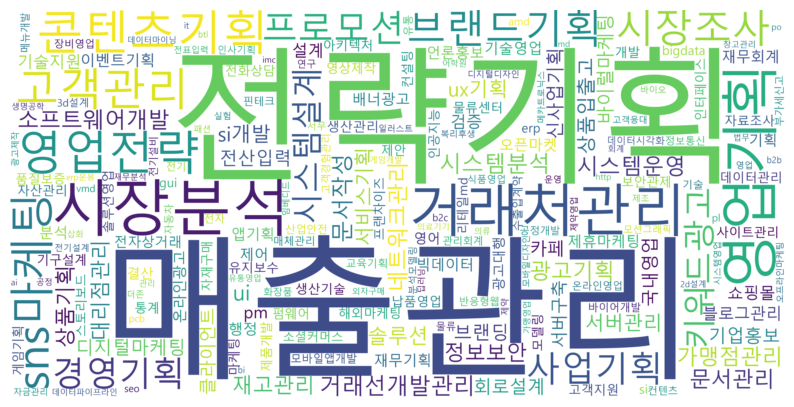

In [186]:
dict_words=dict(zip(words, counts))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=1600,height=800,stopwords=stopwords,font_path=r"C:\Windows\Fonts\malgun.ttf",background_color="white",colormap='viridis',scale=3).generate_from_frequencies(dict_words)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

In [152]:
wordcloud.to_file('wordcloud.png')

In [153]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic")


In [154]:
df2=df[(df['시'] != '서울') & (df['시'] != '경기') & (df['시'] != '경기 외') & (df['시'] != '서울 외') & (df['시'] != '전국') & (df['시'] != '인천') ]

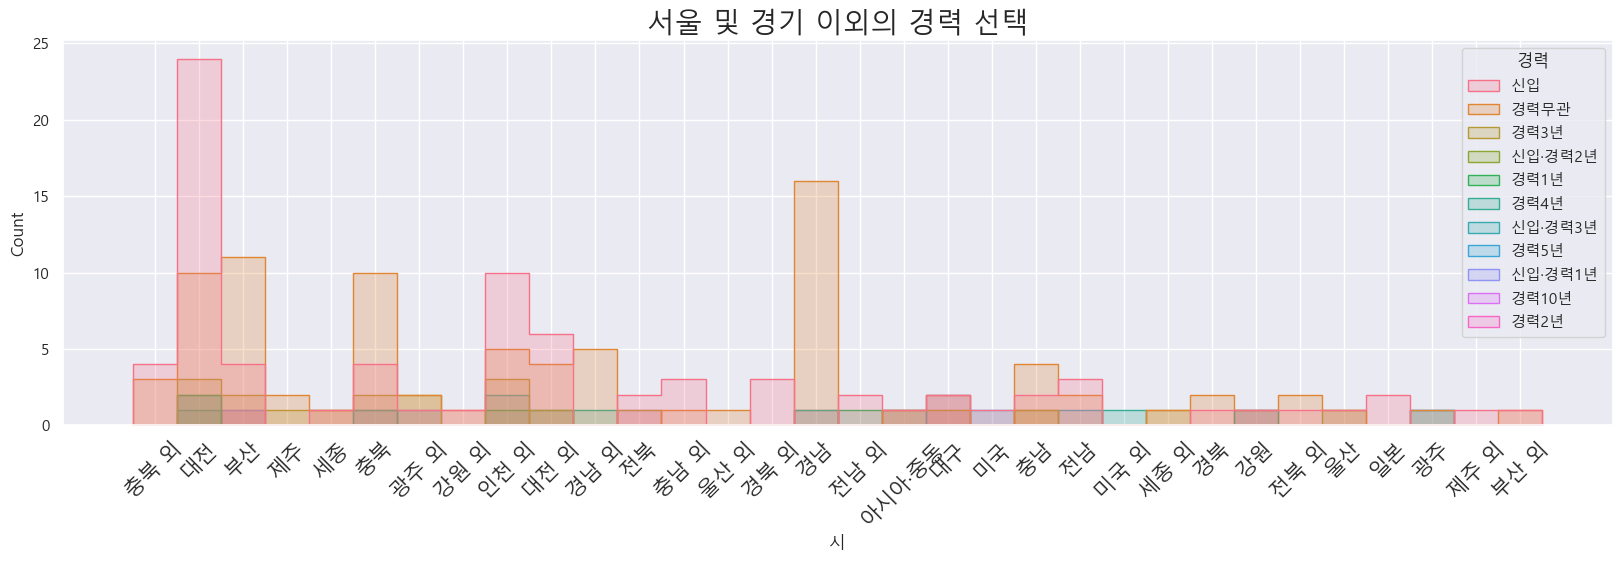

In [155]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=45)
ax=sns.histplot(df2, x="시", hue="경력", element="step")
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=11)
plt.title("서울 및 경기 이외의 경력 선택",fontsize=20)
plt.show();

In [156]:
df3=df[(df['시'] == '서울') | (df['시'] == '경기') | (df['시'] == '경기 외') | (df['시'] == '서울 외') | (df['시'] == '전국') | (df['시'] == '인천')]

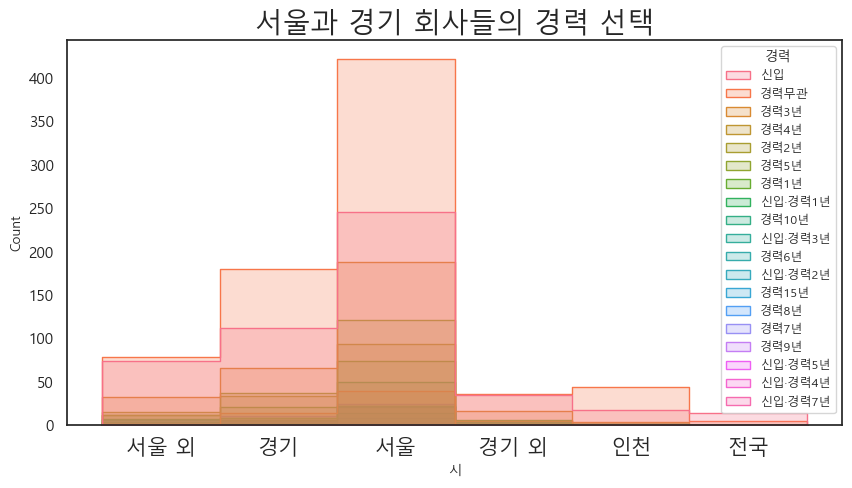

In [157]:
plt.figure(figsize=(10, 5))
sns.set(font="Malgun Gothic", 
 style='white',font_scale=0.8)
ax=sns.histplot(df3, x="시", hue="경력", element="step")
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=11)
plt.title("서울과 경기 회사들의 경력 선택",fontsize=20)
plt.show();

In [158]:
freq=df['경력'].value_counts()
len(freq)

19

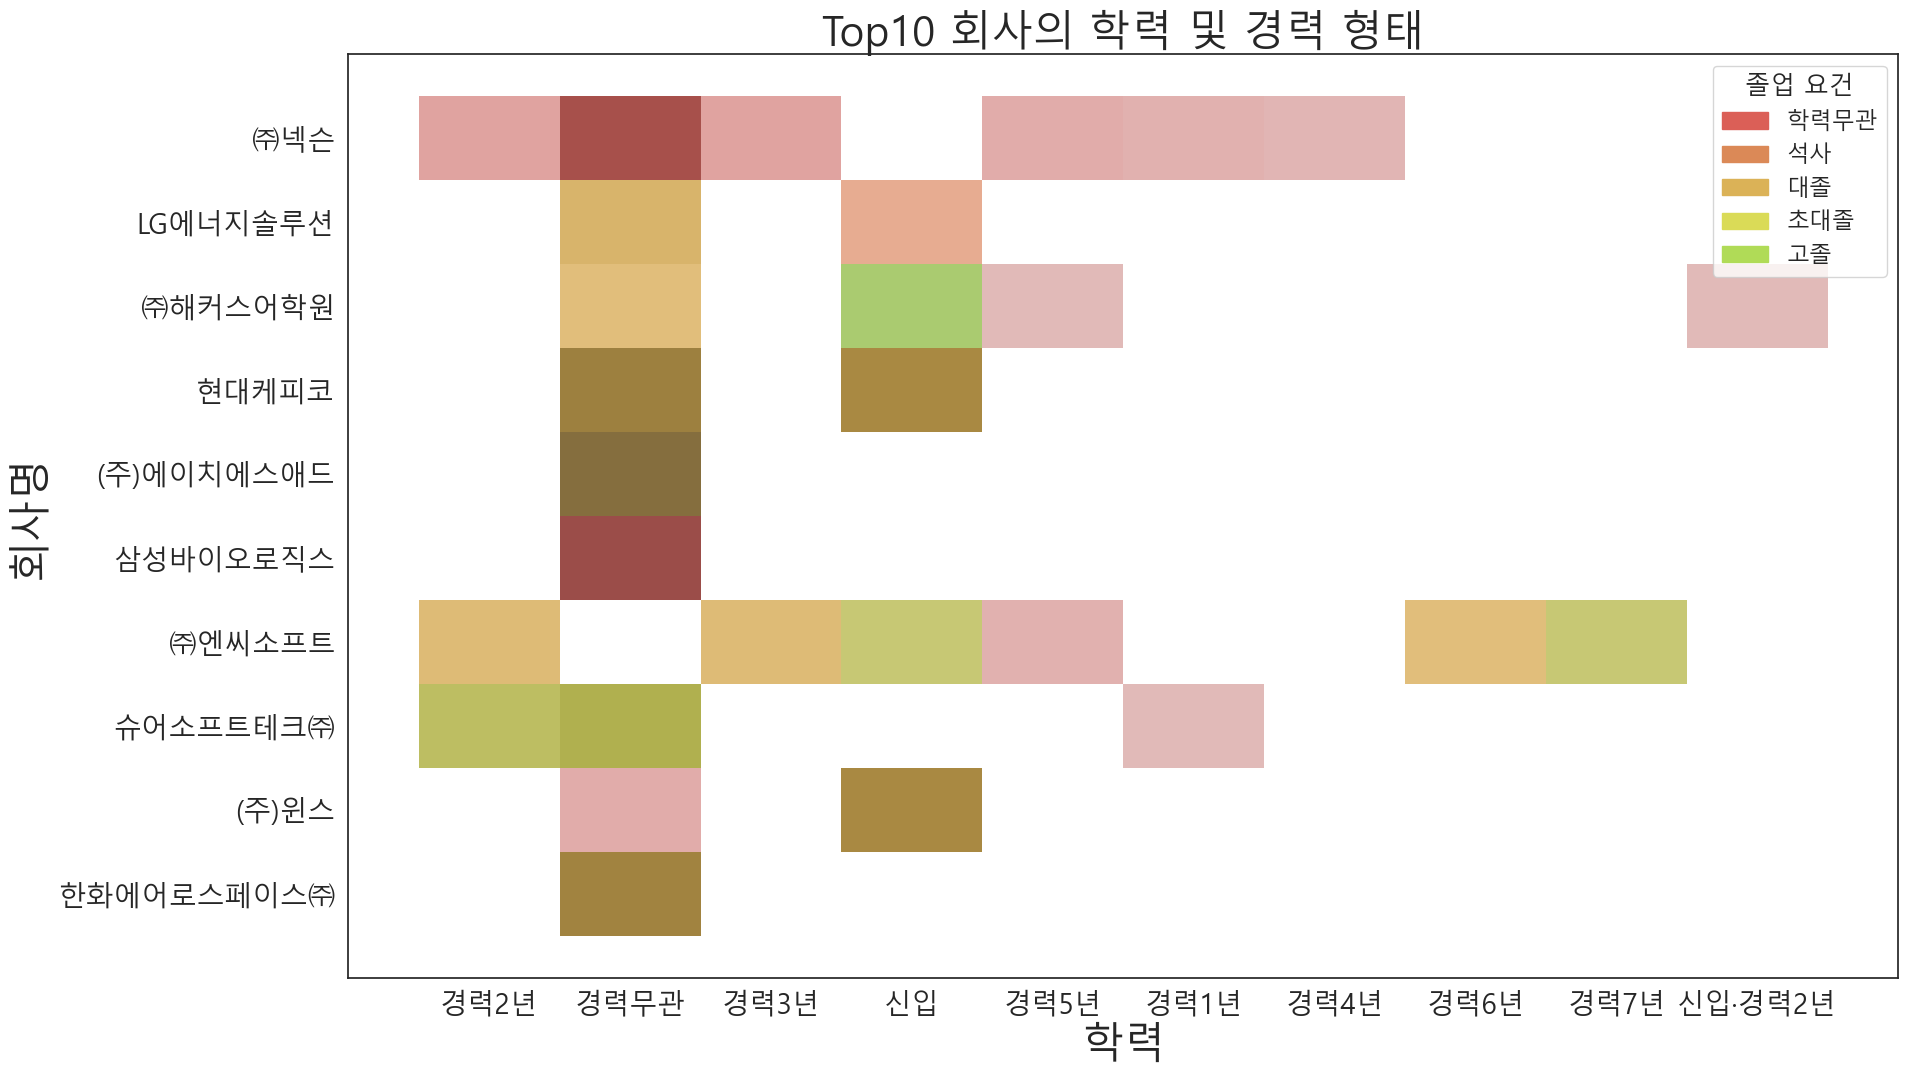

In [159]:
top_companies = df['회사명'].value_counts().head(10).index
filtered_df = df[df['회사명'].isin(top_companies)]
palette_color=sns.color_palette('hls',19)
sns.set(font="Malgun Gothic", style='white',font_scale=1.5)
plt.figure(figsize=(20, 12))
ax=sns.histplot(filtered_df,x='경력', y='회사명', hue='졸업 요건',palette=palette_color)
ax.tick_params(axis='x', labelsize=20) 
ax.tick_params(axis='y', labelsize=20)
plt.xlabel('학력', fontsize=30)
plt.ylabel('회사명', fontsize=30)
plt.title("Top10 회사의 학력 및 경력 형태",fontsize=30)
plt.show();


In [160]:
palette_color = sns.cubehelix_palette(8)

In [161]:
df4=df['근로 시간'].value_counts()
labels=df['근로 시간'].value_counts().index

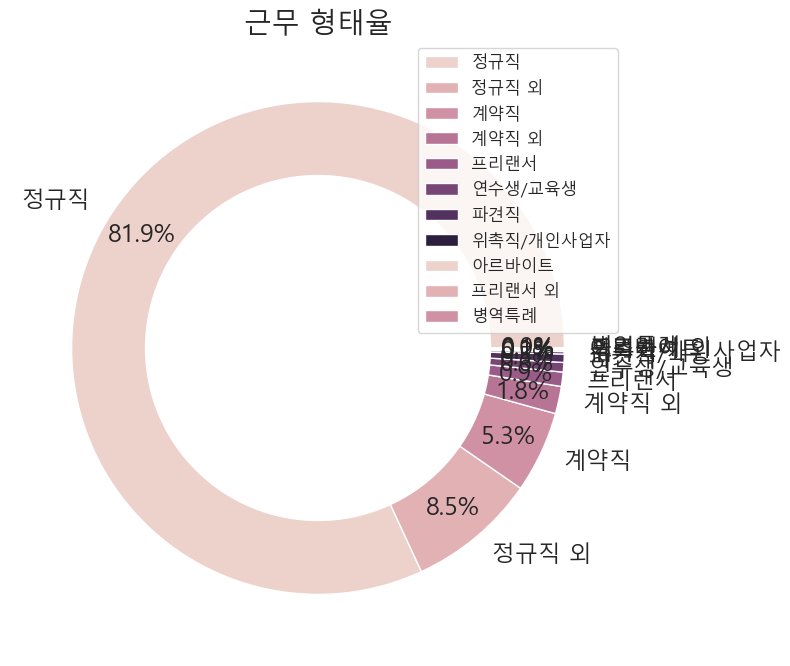

In [162]:
plt.figure(figsize=(10,8))

plt.pie(df4, colors=palette_color, labels=df['근로 시간'].value_counts().index,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels,loc=1, prop={'size': 12})
plt.title("근무 형태율",fontsize=20)
plt.show();

In [163]:
df5=df['경력'].value_counts()
labels=df['경력'].value_counts().index

In [164]:
palette_color=sns.light_palette("xkcd:copper", 8)
labels=df['경력'].value_counts().index

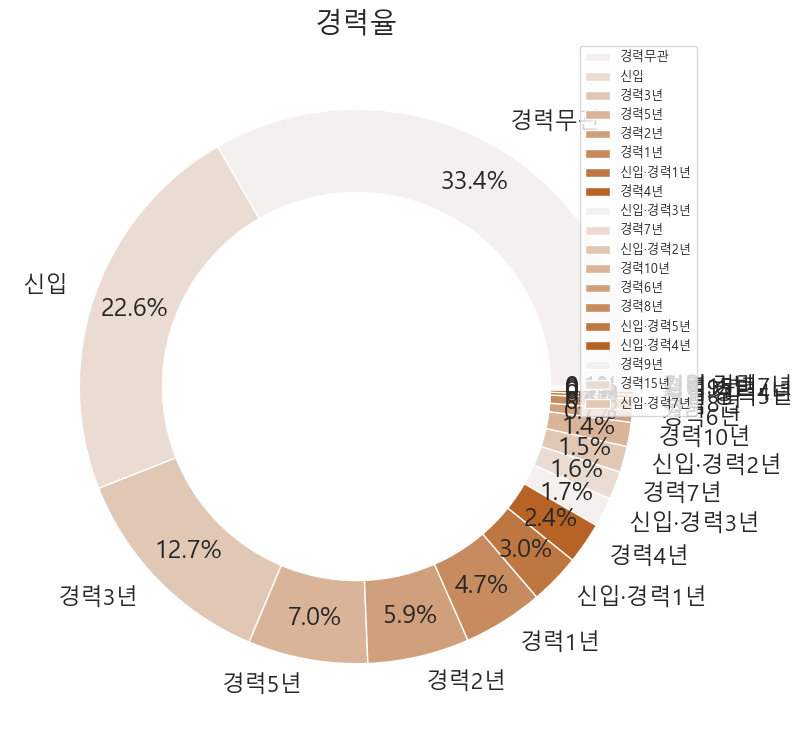

In [165]:
plt.figure(figsize=(10,9))
plt.pie(df5, colors=palette_color, labels=df['경력'].value_counts().index,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels,loc=1, prop={'size': 9})
plt.title("경력율",fontsize=20)
plt.show();

In [166]:
df6=df['졸업 요건'].value_counts()
labels=df['졸업 요건'].value_counts().index

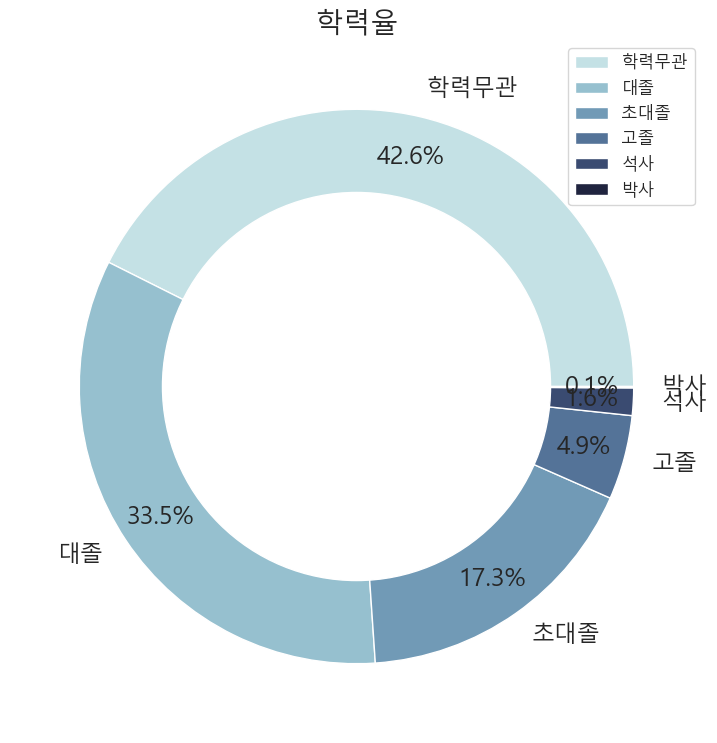

In [167]:
plt.figure(figsize=(10,9))
plt.pie(df6, colors=sns.cubehelix_palette(rot=-.2), labels=df['졸업 요건'].value_counts().index,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(labels,loc=1, prop={'size': 12})
plt.title("학력율",fontsize=20)
plt.show();

In [168]:
img1=df.groupby(['경력','졸업 요건'])['근로 시간'].size().unstack().fillna(0).T

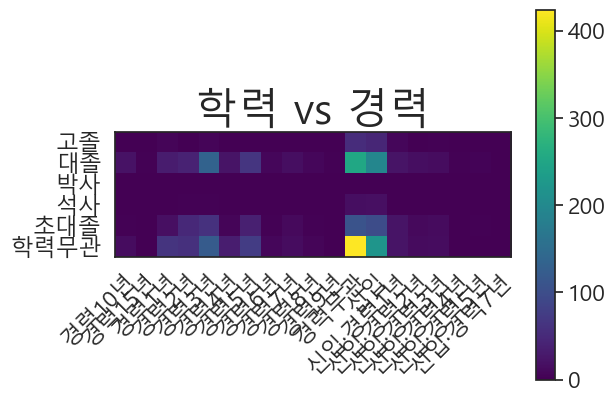

In [169]:
fig,ax=plt.subplots()
im=ax.imshow(img1,cmap='viridis')
ax.figure.colorbar(im, ax=ax)
ax.set_xticks(np.arange(len(img1.columns)))
ax.set_yticks(np.arange(len(img1.index)))
ax.set_xticklabels(img1.columns)
ax.set_yticklabels(img1.index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_title("학력 vs 경력",size='30')
plt.show();

In [170]:
summary(df)

,데이터 종류,빈값,특별갯수,많이 노온
회사명,object,0,1479,"[휴먼교육센터, 스노우, ㈜스마일게이트홀딩스, 더치트주식회사, 엘앤티토요타㈜, ㈜아..."
직업 제목,object,0,2552,"[[전액무료 IT취업] 파이썬/데이터분석/인공지능/자바웹개발자 교육생모집, 서비스 ..."
경력,object,0,19,"[신입, 경력무관, 경력3년, 경력4년, 경력2년, 경력5년, 경력1년, 신입·경력1년]"
졸업 요건,object,0,6,"[학력무관, 대졸, 석사, 초대졸, 고졸, 박사]"
근로 시간,object,0,11,"[연수생/교육생, 정규직, 정규직 외, 계약직, 계약직 외, 프리랜서, 병역특례, ..."
시,object,0,38,"[서울 외, 경기, 서울, 경기 외, 충북 외, 대전, 인천, 부산]"
구,object,0,211,"[서울 영등포구 외, 경기 성남시, 서울 마포구, 서울 강남구, 서울 서초구, 서울..."
지원 마감일,object,0,58,"[~12/12(화), ~12/03(일), ~12/30(토), ~12/31(일), ~..."
설명,object,0,2188,"[네트워크관리, GUI, 빅데이터, OLAP개발자, 데이터관리, 암호화폐, SI개발..."


In [171]:
img2=df.groupby(['시','졸업 요건'])['시'].count().unstack().fillna(0).T

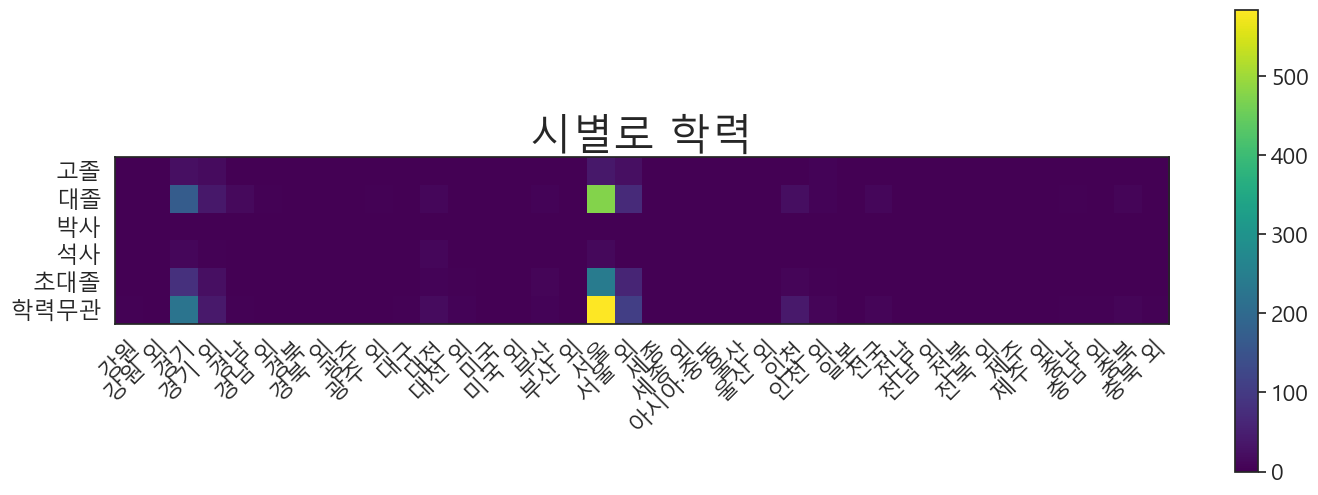

In [190]:
fig,ax=plt.subplots(figsize=(17, 6))
im=ax.imshow(img2,cmap='viridis')
ax.figure.colorbar(im, ax=ax)
ax.set_xticks(np.arange(len(img2.columns)))
ax.set_yticks(np.arange(len(img2.index)))
ax.set_xticklabels(img2.columns)
ax.set_yticklabels(img2.index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_title("시별로 학력",size='30')
plt.show();

In [173]:
# BACKGROUND 
'''특히 데이터 분석 분야에서 잡코리아 웹사이트의 채용 데이터를 분석하는 것은 한국에서 데이터 
분석 경력을 시작하는 사람에게 인사이트를 얻을 수 있는 몇 가지 중요한 기회를 제공합니다.'''

'특히 데이터 분석 분야에서 잡코리아 웹사이트의 채용 데이터를 분석하는 것은 한국에서 데이터 \n분석 경력을 시작하는 사람에게 인사이트를 얻을 수 있는 몇 가지 중요한 기회를 제공합니다.'

In [174]:
'''1. Trends in Skill Requirements
Goal: Identify the most in-demand skills and technologies in the data analysis field.
Analysis: Examine the keywords in the job descriptions to see which skills (like '빅데이터', '인공지능', etc.) are most frequently mentioned. This can help understand what employers are currently looking for.
Outcome: This information can guide your learning and development path, ensuring you're acquiring the most marketable skills.'''



"1. Trends in Skill Requirements\nGoal: Identify the most in-demand skills and technologies in the data analysis field.\nAnalysis: Examine the keywords in the job descriptions to see which skills (like '빅데이터', '인공지능', etc.) are most frequently mentioned. This can help understand what employers are currently looking for.\nOutcome: This information can guide your learning and development path, ensuring you're acquiring the most marketable skills."

In [175]:
'''Educational and Experience Requirements
Goal: Gauge the typical educational and experience levels demanded by employers.
Analysis: Compile data on the required education level (e.g., bachelor's, master's) and experience (e.g., entry-level, experienced) and analyze the distribution.
Outcome: This can provide a reality check on what qualifications are actually necessary to break into or advance in the field.'''

"Educational and Experience Requirements\nGoal: Gauge the typical educational and experience levels demanded by employers.\nAnalysis: Compile data on the required education level (e.g., bachelor's, master's) and experience (e.g., entry-level, experienced) and analyze the distribution.\nOutcome: This can provide a reality check on what qualifications are actually necessary to break into or advance in the field."

In [176]:
df[df['설명'].str.contains("C#")]

,회사명,직업 제목,경력,졸업 요건,근로 시간,시,구,지원 마감일,설명
1155,대한상공회의소 충남인력개발원,ICT융합 스마트팩토리 제어설계 교육생 모집(K-디지털),신입,학력무관,연수생/교육생,충남 외,충남,상시채용,"C#, 내선공사, 로봇, ICT융합, SCADA, XR, 직업전문학교, 게임기획, ..."
1466,원앤원㈜,[원할머니 본사] 사내 IT 시스템 개발자 채용 (ERP개발자),경력5년,초대졸,정규직,서울,서울 성동구 외,~12/28(목),"POS, C#, MS-SQL, ERP운영, 시스템분석, mssql, ERP개발, 시..."
1869,㈜테스콤,Python S/W 설계,신입·경력3년,대졸,정규직,경기 외,경기 고양시 외,~12/20(수),"전자, C#, Python, 시스템분석, 파이썬, 아키텍처, 시스템설계"
1996,㈜비아트론,디스플레이장비 제어 Software개발,신입·경력3년,초대졸,정규직,경기,경기 수원시,~12/16(토),"C++, C#, 시스템분석, 시스템운영, 반도체, 자동제어, 클라이언트, 시스템설계..."
2486,한화에어로스페이스㈜,LS사업부 수상체계연구센터 분야별 R&D 경력사원 모집(상시채용)-연구개발(기계),경력무관,대졸,정규직,경남,경남 창원시,상시채용,"제어·설계, C/C++/C#, 회로설계, ANSYS, OrCAD, AutoCAD/C..."
2487,한화에어로스페이스㈜,LS사업부 수상체계연구센터 분야별 R&D 경력사원 모집(상시채용)-연구개발(HW),경력무관,대졸,정규직,경남,경남 창원시,상시채용,"제어·설계, C/C++/C#, 회로설계, ANSYS, OrCAD, AutoCAD/C..."
2488,한화에어로스페이스㈜,LS사업부 수상체계연구센터 분야별 R&D 경력사원 모집(상시채용),경력무관,대졸,정규직,경남,경남 창원시,상시채용,"제어·설계, C/C++/C#, 회로설계, ANSYS, OrCAD, AutoCAD/C..."
2543,㈜팬코,각 부문별 신입 및 경력사원 채용,신입,대졸,정규직,서울 외,서울 성동구 외,상시채용,"C#, 생산기획, ESG, 영업생산, 섬유공장, 섬유, 의류, 경영기획, 사업기획,..."


In [177]:
df=df.reset_index().drop('index',axis=1)

In [178]:
df[df['직업 제목'].str.contains("Python")] #| (df['직업 제목'].str.contains("R"))]

,회사명,직업 제목,경력,졸업 요건,근로 시간,시,구,지원 마감일,설명
1184,㈜테스콤,Python S/W 설계,신입·경력3년,대졸,정규직,경기 외,경기 고양시 외,~12/20(수),"전자, C#, Python, 시스템분석, 파이썬, 아키텍처, 시스템설계"
1546,㈜테스콤,Python S/W 설계 경력직 채용,경력3년,대졸,정규직,경기,경기 고양시 외,~12/01(금),"전자, 시스템분석, 시스템설계, 정보보안, 클라이언트, SI개발"
1698,㈜포이시스,[본사/대구/부산] Java / Python 활용 / Android/ios/ 금융솔...,신입,초대졸,정규직 외,서울 외,서울 금천구 외,상시채용,"모바일앱개발, SM, 모바일디자인, ISP, UI·UX기획, 소프트웨어개발"
2185,충북대학교병원,파이썬 Python 프로그램 개발자 모집,경력무관,학력무관,계약직 외,충북,충북 청주시,상시채용,"병원, GUI, 인터페이스, 데이터분석, 데이터시각화, 분석모델링, 모델링, 딥러닝..."


In [179]:
df.iloc[1276,8]

'세일즈포스 컨설턴트, Salesforce, CRM 서비스, CRM영업, 세일즈포스, CRM'

In [180]:
df.columns[df.dtypes==object]

Index(['회사명', '직업 제목', '경력', '졸업 요건', '근로 시간', '시', '구', '지원 마감일', '설명'], dtype='object')

In [181]:
for col in df.columns:
    df[col]=df[col].astype('category')

In [182]:
summary(df)

,데이터 종류,빈값,특별갯수,많이 노온
회사명,category,0,1479,"[휴먼교육센터, 스노우, ㈜스마일게이트홀딩스, 더치트주식회사, 엘앤티토요타㈜, ㈜아..."
직업 제목,category,0,2552,"[[전액무료 IT취업] 파이썬/데이터분석/인공지능/자바웹개발자 교육생모집, 서비스 ..."
경력,category,0,19,"[신입, 경력무관, 경력3년, 경력4년, 경력2년, 경력5년, 경력1년, 신입·경력1년]"
졸업 요건,category,0,6,"[학력무관, 대졸, 석사, 초대졸, 고졸, 박사]"
근로 시간,category,0,11,"[연수생/교육생, 정규직, 정규직 외, 계약직, 계약직 외, 프리랜서, 병역특례, ..."
시,category,0,38,"[서울 외, 경기, 서울, 경기 외, 충북 외, 대전, 인천, 부산]"
구,category,0,211,"[서울 영등포구 외, 경기 성남시, 서울 마포구, 서울 강남구, 서울 서초구, 서울..."
지원 마감일,category,0,58,"[~12/12(화), ~12/03(일), ~12/30(토), ~12/31(일), ~..."
설명,category,0,2188,"[네트워크관리, GUI, 빅데이터, OLAP개발자, 데이터관리, 암호화폐, SI개발..."


<h1> Conclusions</h1>

aa
